## step1: load the dataset using pandas library

In [1]:
# import the library using pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_excel('pima-data.xlsx')
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1.8912,False,False
764,2,122,70,27,0,36.8,0.340,27,0,1.0638,False,False
765,5,121,72,23,112,26.2,0.245,30,0,0.9062,False,False
766,1,126,60,0,0,30.1,0.349,47,1,0.0000,True,True


In [3]:
df.shape

(768, 12)

In [4]:
pd.set_option('display.max_rows',None)
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True
5,5,116,74,0,0,25.6,0.201,30,0,0.0000,False,False
6,3,78,50,32,88,31.0,0.248,26,1,1.2608,True,True
7,10,115,0,0,0,35.3,0.134,29,0,0.0000,False,False
8,2,197,70,45,543,30.5,0.158,53,1,1.7730,True,True
9,8,125,96,0,0,0.0,0.232,54,1,0.0000,True,True


In [5]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes_orig', 'skin', 'has_diabetes',
       'diabetes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_preg       768 non-null    int64  
 1   glucose_conc   768 non-null    int64  
 2   diastolic_bp   768 non-null    int64  
 3   thickness      768 non-null    int64  
 4   insulin        768 non-null    int64  
 5   bmi            768 non-null    float64
 6   diab_pred      768 non-null    float64
 7   age            768 non-null    int64  
 8   diabetes_orig  768 non-null    int64  
 9   skin           768 non-null    float64
 10  has_diabetes   768 non-null    bool   
 11  diabetes       768 non-null    bool   
dtypes: bool(2), float64(3), int64(7)
memory usage: 61.6 KB


# step2:cleaning the data
## a. finding the null values


In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().values.sum()

0

In [9]:
df.size

9216

## find the correlation between the columns

In [10]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,-0.081672,0.221898,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.057328,0.466581,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.207371,0.065068,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,1.000000,0.074752,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,0.436783,0.130548,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.392573,0.292695,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.183928,0.173844,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,-0.113970,0.238356,0.238356
diabetes_orig,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.074752,1.000000,1.000000
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,1.000000,0.074752,0.074752


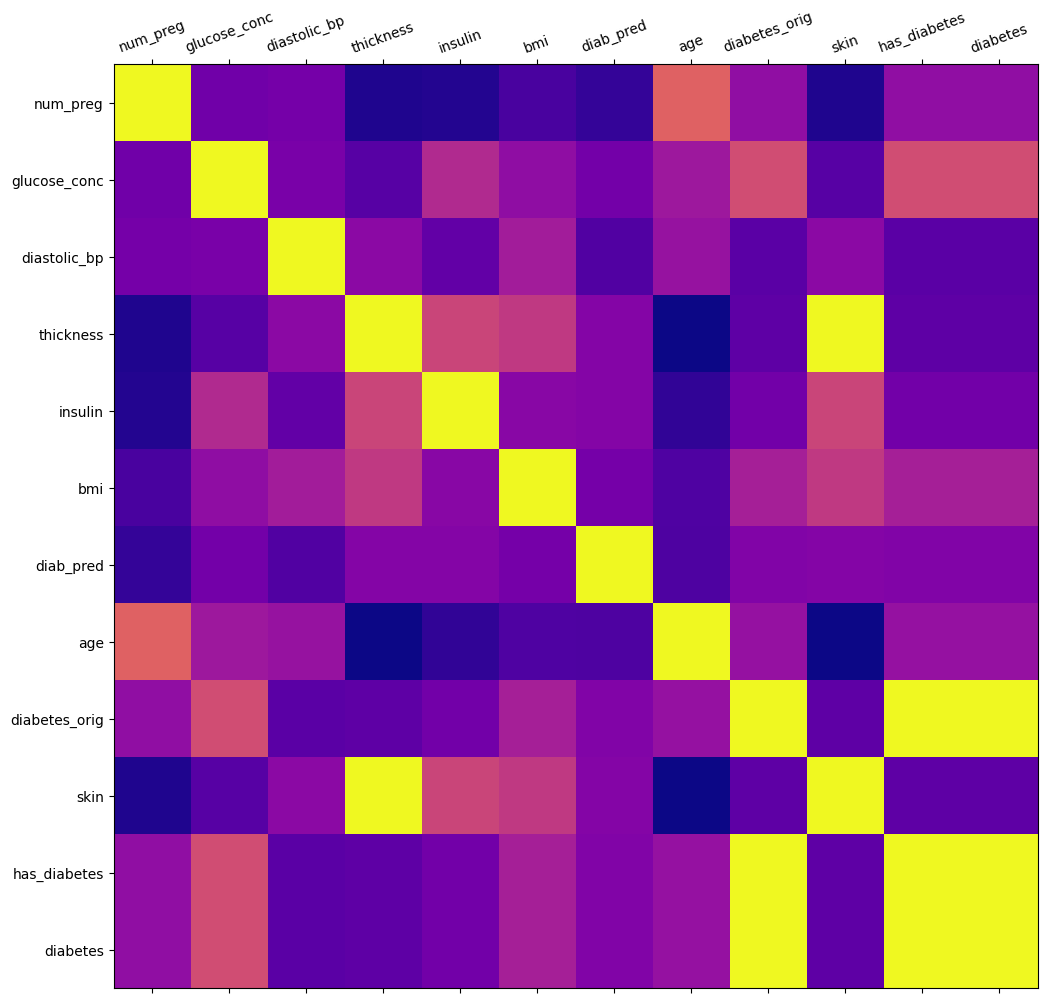

In [11]:
# Correlation code
def plot_corr(df,size=12):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size, size))
    cmap='plasma'
    ax.matshow(corr,cmap=cmap)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation=20)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(df)

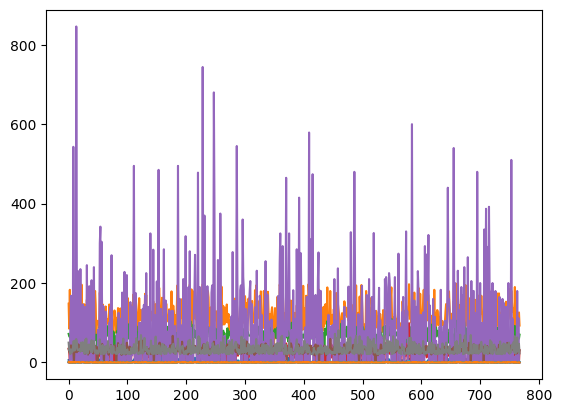

In [12]:
a=plt.plot(df)

# Correlated columns are 
## Thickness and Skin are correlated to each other
## diabetes_orig and has_diabetes
## diabetes and has_diabetes
## diabetes_orig and diabetes

## Drop the correlated columns

In [13]:
df.drop('diabetes_orig',axis=1,inplace=True)
df.drop('has_diabetes',axis=1,inplace=True)
df.drop('thickness',axis=1,inplace=True)

In [14]:
df

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,25.6,0.201,30,0.0000,False
6,3,78,50,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0.0,0.232,54,0.0000,True


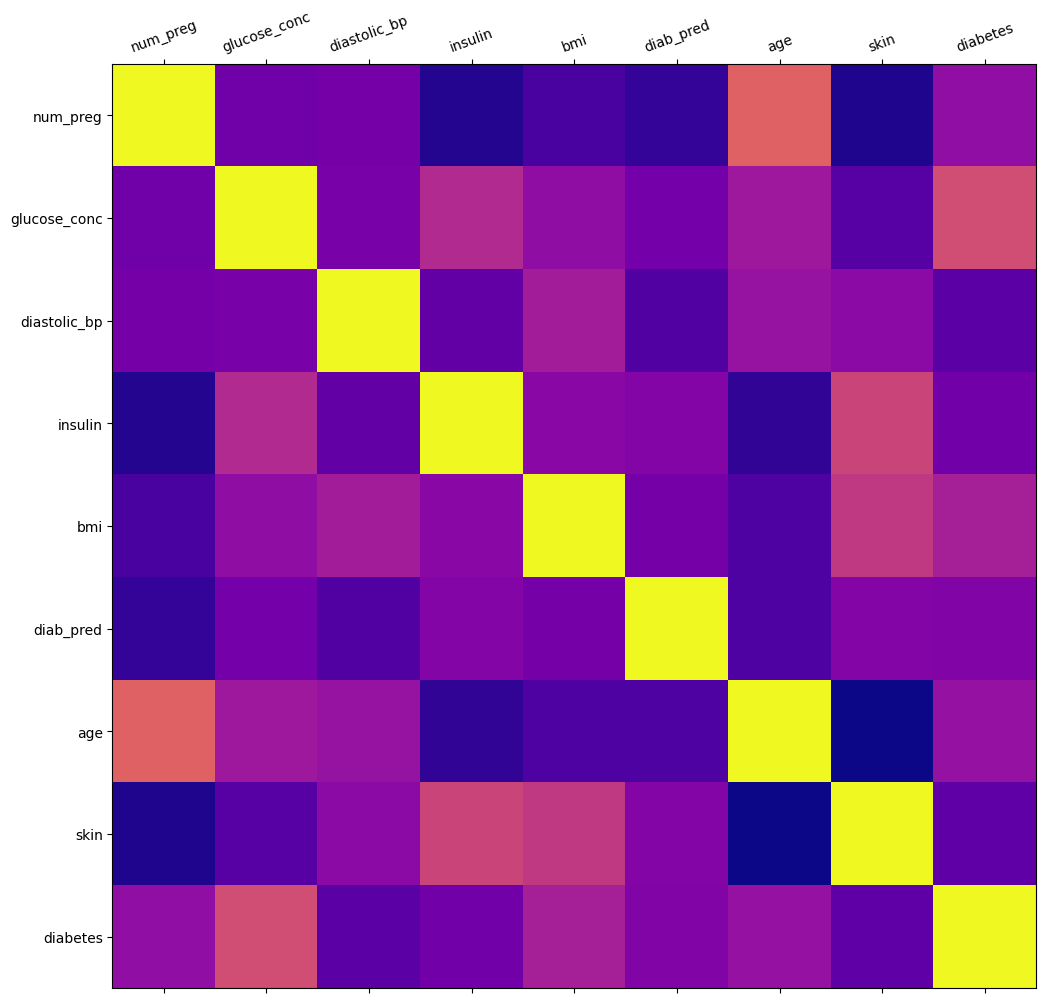

In [15]:
plot_corr(df)

## Convert text into integer

In [16]:
dict1={
    'diabetes':[True,False]
}
dict2={
    'diabetes':[1,0]
}
# df.replace(dict1,dict2,inplace=True) ior we can also use this one
df.replace(dict1,dict2,inplace=True)

C:\Users\jayan\AppData\Local\Temp\ipykernel_3376\4046666365.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(dict1,dict2,inplace=True)


In [17]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


## To check the Proportion

In [18]:
# identifying the true values and false values 
num_true=len(df.loc[df['diabetes'] == 1])
num_false=len(df.loc[df['diabetes'] == 0]) 
print(f"True Values is:{num_true}")
print(f"False Values is:{num_false}")

True Values is:268
False Values is:500


In [19]:
per_num_true=(num_true / (num_true+num_false))*100
per_num_false=(num_false / (num_true+num_false))*100
print(f"True Percentage = {per_num_true}")
print(f"False Percentage = {per_num_false}")

True Percentage = 34.89583333333333
False Percentage = 65.10416666666666


# Step3: Train, Test, Split

## splitting the data horizontal and vertical cut

In [20]:
# pip install scikit-learn

In [21]:
df.columns
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=split_test_size,random_state=42) #random 42 is used for get same test sample
#print("Train:",x_train)
#print("Test:",x_test)

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [22]:
from sklearn.model_selection import train_test_split
input_columns=['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi','diab_pred', 'age', 'skin']
output_columns=['diabetes']
x=df[input_columns].values
y=df[output_columns].values

split_test_size=0.3
 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=split_test_size,random_state=42) #random 42 is used for get same test sample


X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = ['a', 'a', 'a', 'b', 'b', 'b', 'a', 'b', 'a', 'b']


#Split the data into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


print("Train:", X_train)
print("Test:", X_test)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537, 1)
(231, 8)
(231, 1)


In [24]:
#checking where it is properly divide into 30 and 70 percentage as we given or not
print('{0:0.2f}% in training set'.format((len(x_train)/len(df.index))*100))
print('{0:0.2f}% in testing set'.format((len(x_test)/len(df.index))*100))                                     

69.92% in training set
30.08% in testing set


In [25]:
# finding the true and false val

print('training true:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ] == 1]),len(y_train[y_train[ : ] == 1])/len(y_train) * 100))
print('training false:{0} ({1:0.2f}%)'.format(len(y_train[y_train[ : ] == 0]),len(y_train[y_train[ : ] == 0])/len(y_train) * 100))
print('test true:{0} ({1:0.2f}%)'.format(len(y_test[y_test[ : ] == 1]),len(y_test[y_test[ : ] == 1])/len(y_test) * 100))
print('test false:{0} ({1:0.2f}%)'.format(len(y_test[y_test[ : ] == 0]),len(y_test[y_test[ : ] == 0])/len(y_test) * 100))

training true:188 (35.01%)
training false:349 (64.99%)
test true:80 (34.63%)
test false:151 (65.37%)


# step4:  Post split preparartion

In [26]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [27]:
total_num_preg=len(df.loc[df['num_preg'] == 0])
print(f"Number of Missing rows in num_preg column is {total_num_preg}")

total_glucose_conc=len(df.loc[df['glucose_conc'] == 0])
print(f"Number of Missing rows in glucose_conc column is {total_glucose_conc}")

total_diastolic_bp=len(df.loc[df['diastolic_bp'] == 0])
print(f"Number of Missing rows in diastolic_bp column is {total_diastolic_bp}")

total_insulin=len(df.loc[df['insulin'] == 0])
print(f"Number of Missing rows in insulin column is {total_insulin}")

total_bmi=len(df.loc[df['bmi'] == 0])
print(f"Number of Missing rows in bmi column is {total_bmi}")

total_diab_pred=len(df.loc[df['diab_pred'] == 0])
print(f"Number of Missing rows in diab_pred column is {total_diab_pred}")

total_age=len(df.loc[df['age'] == 0])
print(f"Number of Missing rows in age column is {total_age}")

total_skin=len(df.loc[df['skin'] == 0])
print(f"Number of Missing rows in skin column is {total_skin}")

Number of Missing rows in num_preg column is 111
Number of Missing rows in glucose_conc column is 5
Number of Missing rows in diastolic_bp column is 35
Number of Missing rows in insulin column is 374
Number of Missing rows in bmi column is 11
Number of Missing rows in diab_pred column is 0
Number of Missing rows in age column is 0
Number of Missing rows in skin column is 227


# Handling Zeroes by Scikit-Learn

In [28]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0,strategy='mean')
x_train=fill_0.fit_transform(x_train)
x_test=fill_0.fit_transform(x_test)

In [29]:
x_train[:3]

array([[1.00000000e+00, 9.50000000e+01, 6.00000000e+01, 5.80000000e+01,
        2.39000000e+01, 2.60000000e-01, 2.20000000e+01, 7.09200000e-01],
       [5.00000000e+00, 1.05000000e+02, 7.20000000e+01, 3.25000000e+02,
        3.69000000e+01, 1.59000000e-01, 2.80000000e+01, 1.14260000e+00],
       [4.34056399e+00, 1.35000000e+02, 6.80000000e+01, 2.50000000e+02,
        4.23000000e+01, 3.65000000e-01, 2.40000000e+01, 1.65480000e+00]])

# Standardize the data 

In [30]:
# from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Step 5: Training the Model
## Train the model using naive bayees algorithm

In [31]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB() #creating object for guassian NB
nb_model.fit(x_train,y_train.ravel()) # training a model #ravel() function is used to convert 2d array into 1d array

GaussianNB()

In [32]:
from sklearn import metrics
#finding the accuracy for train
nb_predict_model=nb_model.predict(x_train)
print(f"Predicted accuracy {metrics.accuracy_score(y_train,nb_predict_model)}")

Predicted accuracy 0.7541899441340782


In [33]:
# FINDING THE ACCURACY FOR TEST
nb_predict_test=nb_model.predict(x_test)
print(f"Predicted accuracy {metrics.accuracy_score(y_test,nb_predict_test)}")

Predicted accuracy 0.7359307359307359


In [34]:
print("Confusion matrix")
print(f"Predicted accura{metrics.confusion_matrix(y_test,nb_predict_test)}")

Confusion matrix
Predicted accuracy:[[118  33]
 [ 28  52]]


In [35]:
print("Classification Report")
print(metrics.classification_report(y_test,nb_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Training the model using RandomForest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(x_train,y_train.ravel())

RandomForestClassifier(random_state=42)

In [37]:
# Predicting for train data
rf_predict_model=rf_model.predict(x_train)
print(f"Predicted accuracy {metrics.accuracy_score(y_train,rf_predict_model)}")

Predicted accuracy 1.0


In [38]:
# Predicting for test data
rf_predict_test=rf_model.predict(x_test)
print(f"Predicted accuracy {metrics.accuracy_score(y_test,rf_predict_test)}")

Predicted accuracy 0.7532467532467533


In [58]:
print("Confusion matrix")
print(f"{metrics.confusion_matrix(y_test,rf_predict_test)}")

Confusion matrix
[[120  31]
 [ 26  54]]


In [57]:
print("Classification Report")
print(metrics.classification_report(y_test,rf_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.64      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



## Training the model using KNeighborsClassifier

In [41]:
#Train the model using KNeighbors
from sklearn.neighbors import KNeighborsClassifier
kn_model=KNeighborsClassifier()
kn_model.fit(x_train,y_train.ravel())

KNeighborsClassifier()

In [42]:
# Predicting for train data
kn_predict_model=kn_model.predict(x_train)
print(f"Predicted accuracy {metrics.accuracy_score(y_train,kn_predict_model)}")

Predicted accuracy 0.8379888268156425


In [43]:
# Predicting for test data
kn_predict_test=kn_model.predict(x_test)
print(f"Predicted accuracy {metrics.accuracy_score(y_test,kn_predict_test)}")

Predicted accuracy 0.7012987012987013


In [50]:
print(f"Confusion matrix = \n {metrics.confusion_matrix(y_test,kn_predict_test)}")

Confusion matrix = 
 [[113  38]
 [ 31  49]]


In [45]:
print("Classification Report")
print(metrics.classification_report(y_test,kn_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       151
           1       0.56      0.61      0.59        80

    accuracy                           0.70       231
   macro avg       0.67      0.68      0.68       231
weighted avg       0.71      0.70      0.70       231



## conclusion: by comparing all models,RF is giving good accuracy .so we prefer RF for my project

In [46]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [47]:
input_data=[6,148,72,0,33.6,0.627,50,1.379]
input_array=np.asarray(input_data).reshape(1,-1)

# Apply the same imputer and scaler to new data
input_array=fill_0.transform(input_array)
print(input_array)
input_array=scaler.transform(input_array)
print(input_array)
prediction=rf_model.predict(input_array)
print("Prediction: ","Diabetic" if prediction[0] == 1 else "Not Diabetic")

[[  6.         148.          72.         156.05084746  33.6
    0.627       50.           1.379     ]]
[[ 0.57468297  0.86398822 -0.01979041  0.00844534  0.19026321  0.45960931
   1.44979298  0.75044047]]
Prediction:  Diabetic


# File Handling

In [48]:
import pickle
# save model
with open('rf_model.pkl','wb') as f:
    pickle.dump(rf_model,f)
# save scaler
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)
# save imputer
with open('imputer.pkl','wb') as f:
    pickle.dump(fill_0,f)